In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [154]:
df_fraud=pd.read_csv('project11b_insurancefraud.csv',parse_dates=['policy_bind_date'])
df_fraud=pd.DataFrame(df_fraud)
df_fraud

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-06-09           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-05-01           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

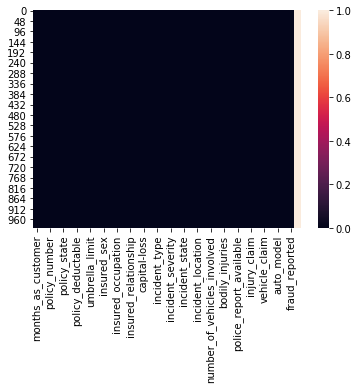

In [155]:
#checking for any missing data
sns.heatmap(df_fraud.isnull())

In [156]:
df_fraud.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [157]:
for i in df_fraud.columns:
    print(df_fraud[i].value_counts())

194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64
116735    1
107181    1
430794    1
115399    1
328387    1
         ..
218456    1
179538    1
357713    1
247116    1
296960    1
Name: policy_number, Length: 1000, dtype: int64
1992-05-08    3
2006-01-01    3
1992-04-28    3
2014-05-07    2
1997-03-02    2
             ..
2003-03-16    1
2006-07-19    1
1992-10-04    1
1995-02-17    1
1996-08-07    1
Name: policy_bind_date, Length: 951, dtype: int64
OH   

In [158]:
df_fraud['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [159]:
df_fraud['police_report_available'].replace('?','Not Known',inplace=True)
#replace with new value 'Not Known'

In [160]:
df_fraud['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [161]:
df_fraud['property_damage'].replace('?','Not Known',inplace=True)
#replace with new value 'Not Known'

In [162]:
df_fraud['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [163]:
df_fraud['collision_type'].replace('?','Not Known',inplace=True)
#replace with new value 'Not Known'

In [164]:
for i in df_fraud.columns:
    print(df_fraud[i].value_counts())

194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64
116735    1
107181    1
430794    1
115399    1
328387    1
         ..
218456    1
179538    1
357713    1
247116    1
296960    1
Name: policy_number, Length: 1000, dtype: int64
1992-05-08    3
2006-01-01    3
1992-04-28    3
2014-05-07    2
1997-03-02    2
             ..
2003-03-16    1
2006-07-19    1
1992-10-04    1
1995-02-17    1
1996-08-07    1
Name: policy_bind_date, Length: 951, dtype: int64
OH   

In [165]:
#checking data types
df_fraud.dtypes
#We can see the attributes are in numerical and categorical form

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                          object
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [166]:
#checking the basic info about the attributes and their counts
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [167]:
df_fraud.drop(['_c39'],axis=1,inplace=True)  #no values present hence dropped

In [168]:
#checking the maximum and minimum values of each attribute and their percentiles
df_fraud.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

# Univariate Analysis

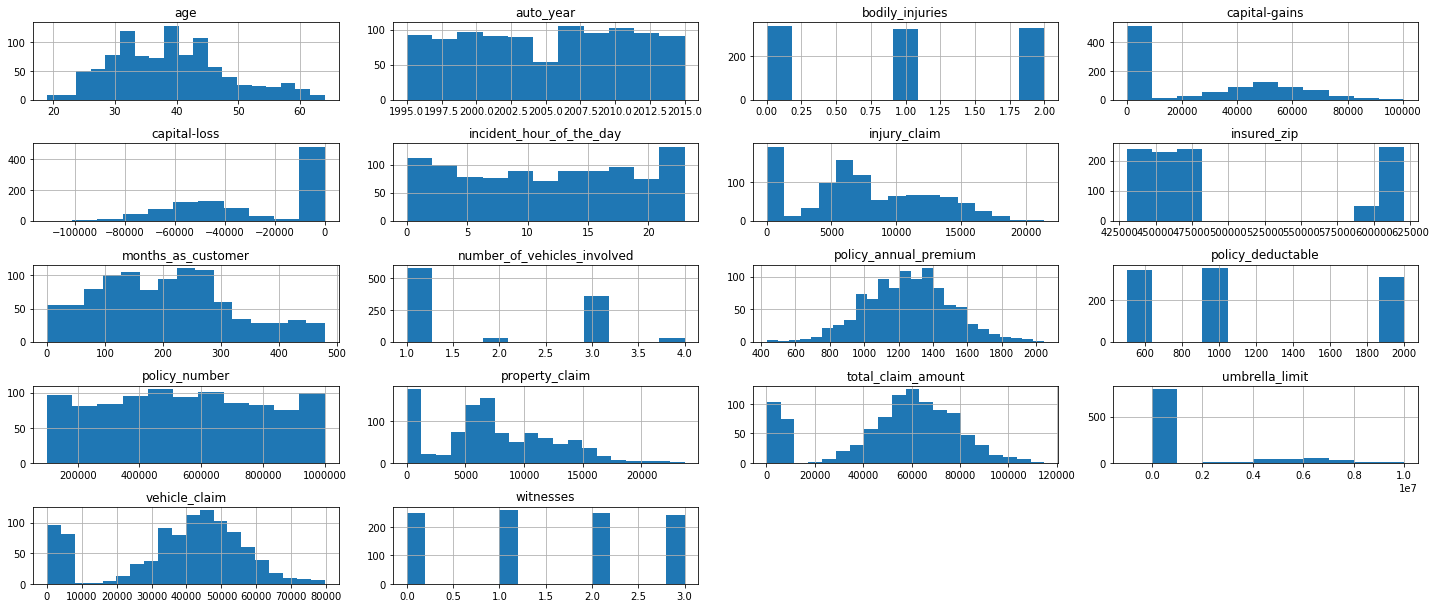

In [169]:
df_fraud.hist(figsize = (20,10), layout=(6,4), bins = 'auto')
plt.tight_layout()
plt.show()

In [170]:
df_fraud.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

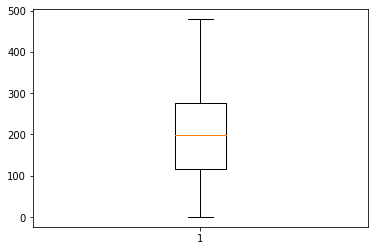

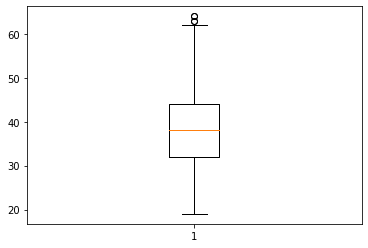

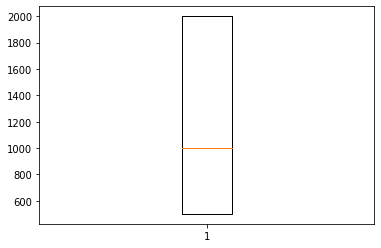

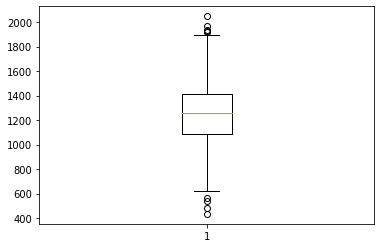

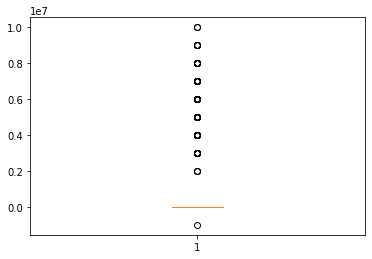

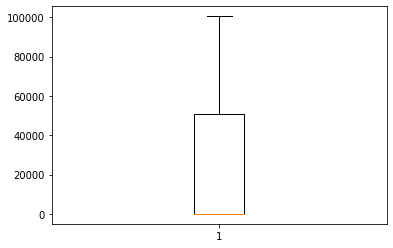

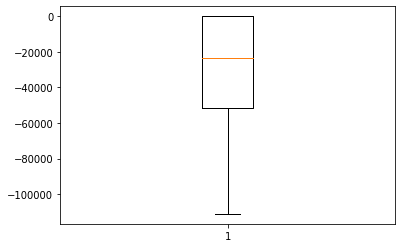

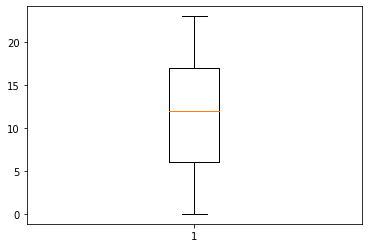

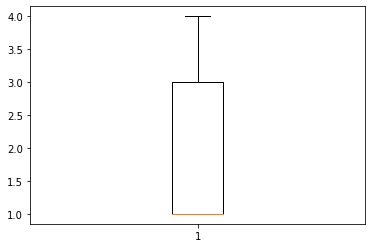

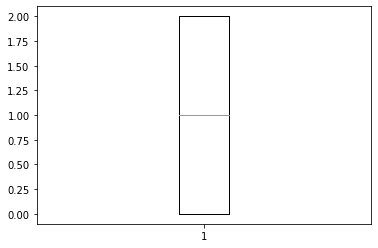

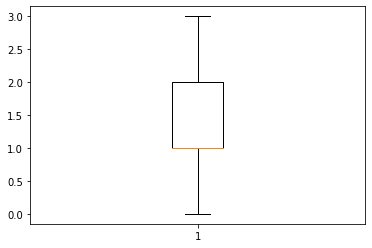

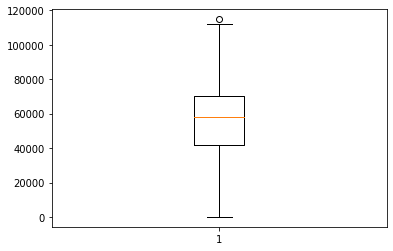

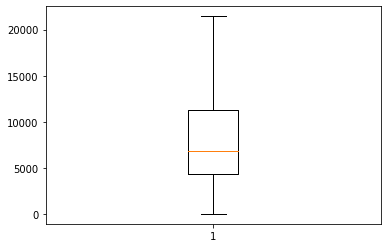

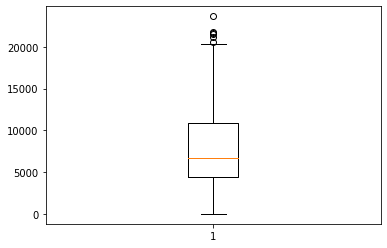

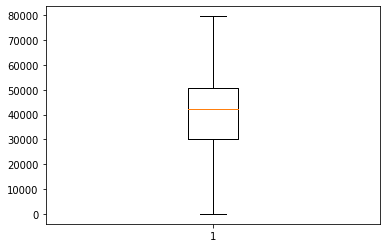

In [171]:
for i in ['months_as_customer','age','policy_deductable','policy_annual_premium', 'umbrella_limit','capital-gains',
    'capital-loss', 'incident_hour_of_the_day','number_of_vehicles_involved', 'bodily_injuries','witnesses',
    'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim']:
    plt.boxplot(df_fraud[i])
    plt.show()

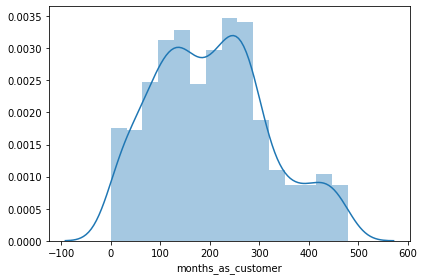

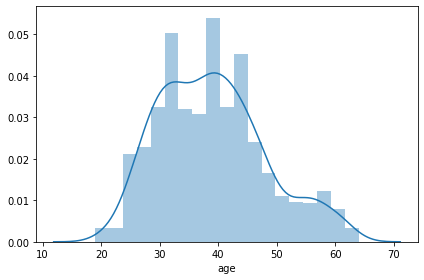

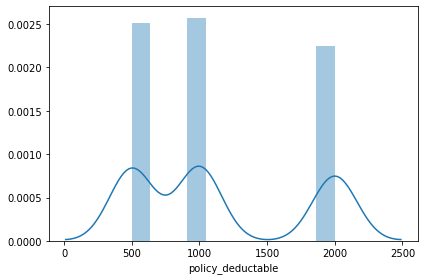

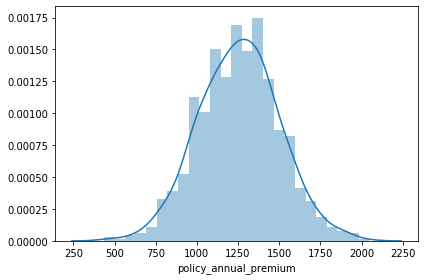

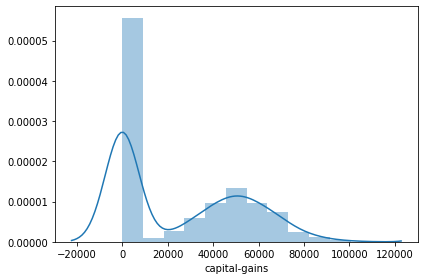

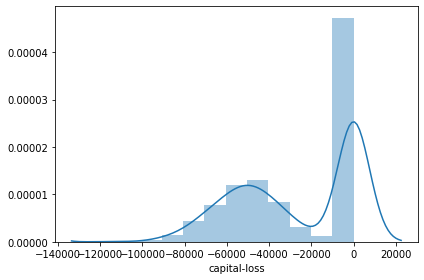

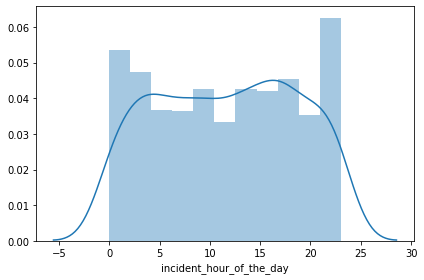

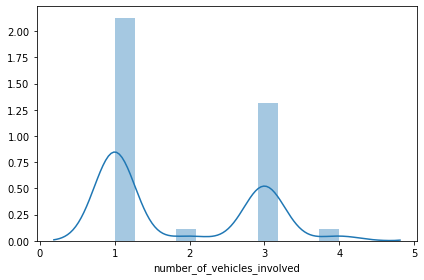

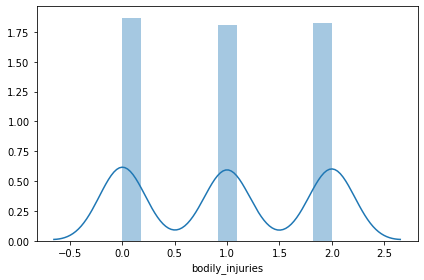

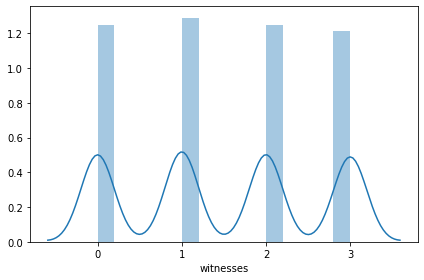

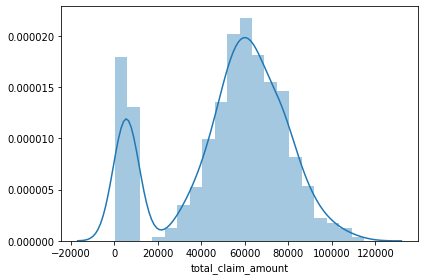

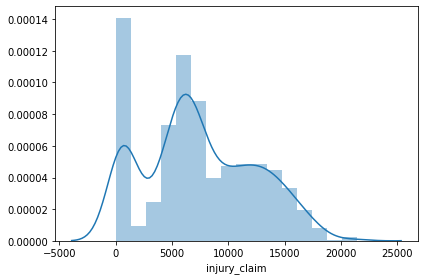

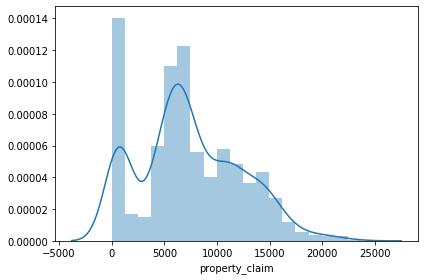

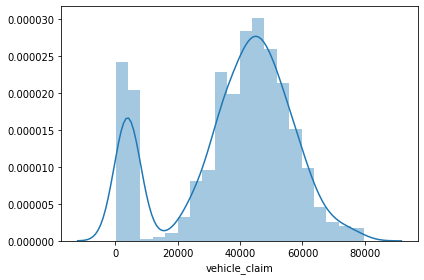

In [172]:
#Checking for the distribution of the data
for i in ['months_as_customer','age','policy_deductable','policy_annual_premium','capital-gains',
    'capital-loss', 'incident_hour_of_the_day','number_of_vehicles_involved', 'bodily_injuries','witnesses',
    'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim']:
    sns.distplot(df_fraud[i],bins='auto')
    plt.tight_layout()
    plt.show()

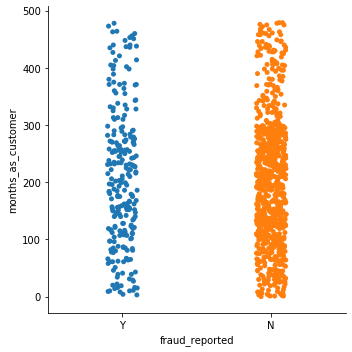

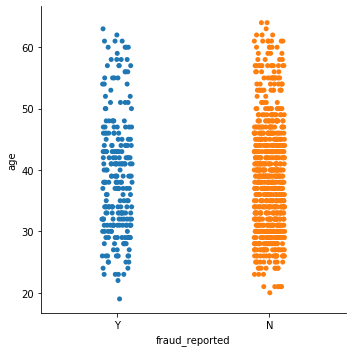

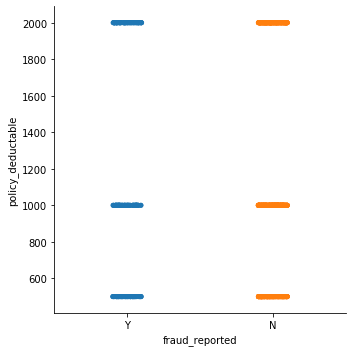

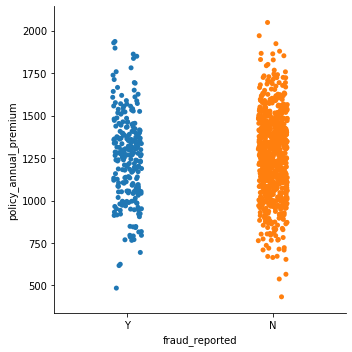

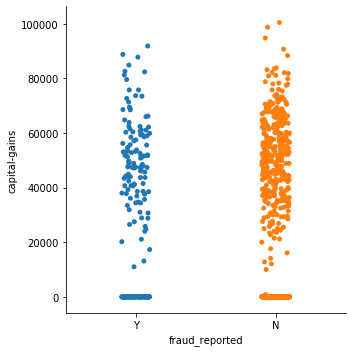

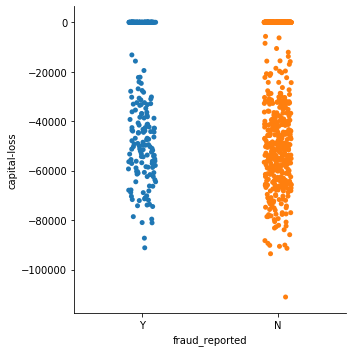

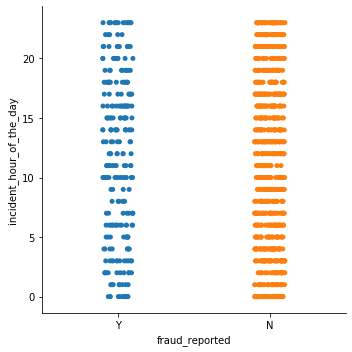

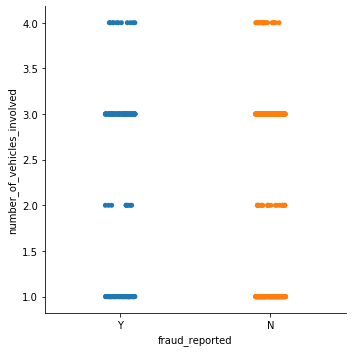

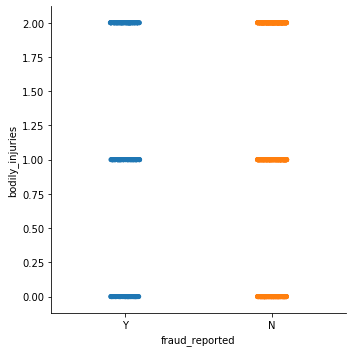

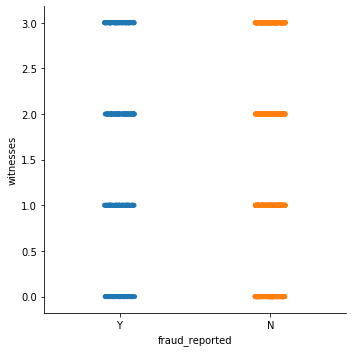

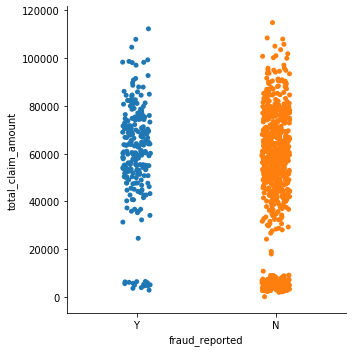

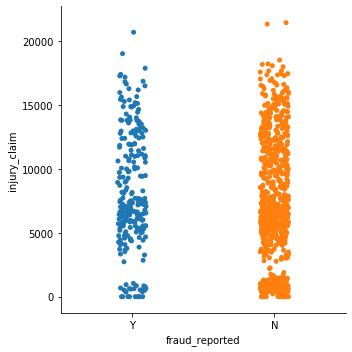

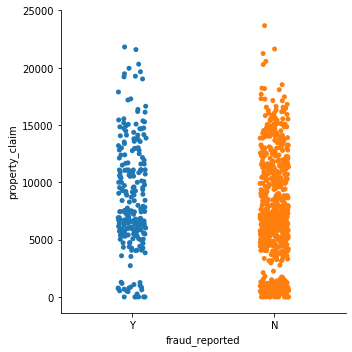

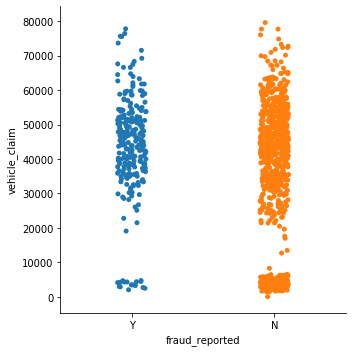

In [173]:
#Checking for the distribution of the data
for i in ['months_as_customer','age','policy_deductable','policy_annual_premium','capital-gains',
    'capital-loss', 'incident_hour_of_the_day','number_of_vehicles_involved', 'bodily_injuries','witnesses',
    'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim']:
    sns.catplot(x='fraud_reported',y=i,data=df_fraud)
    plt.tight_layout()
    plt.show()

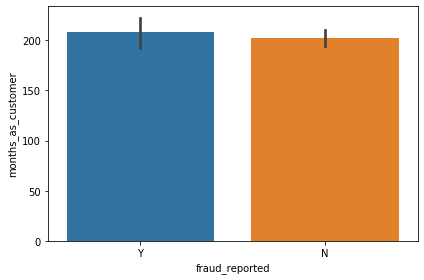

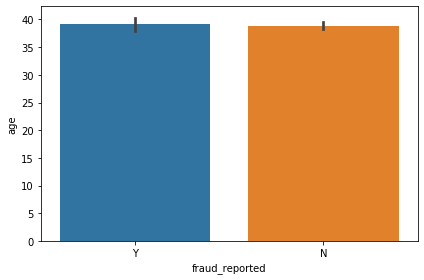

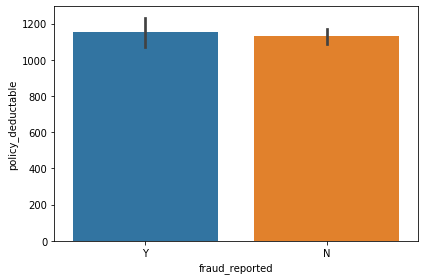

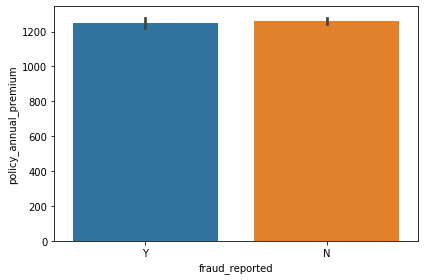

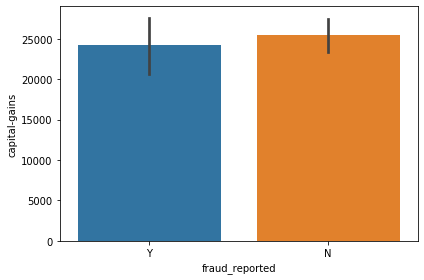

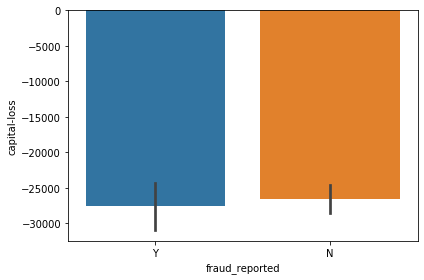

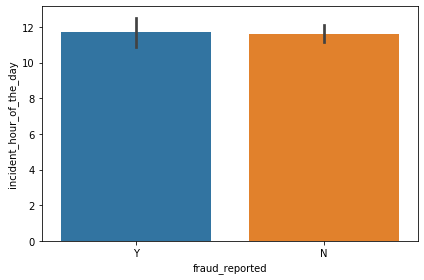

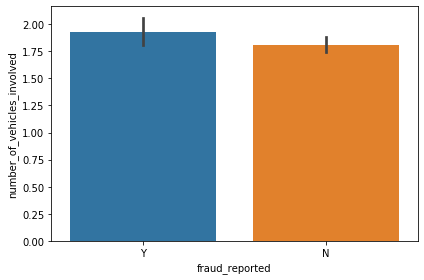

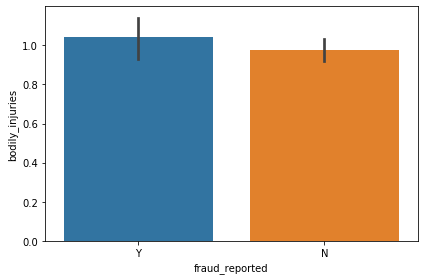

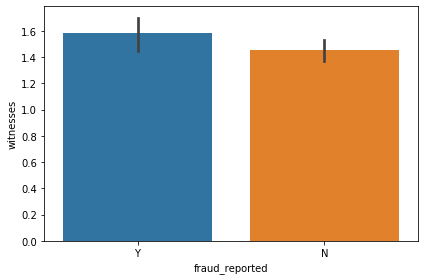

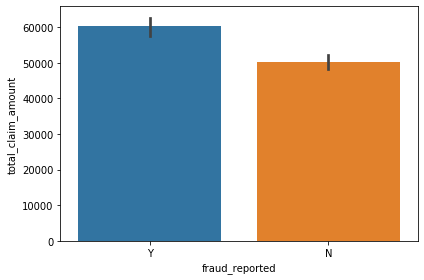

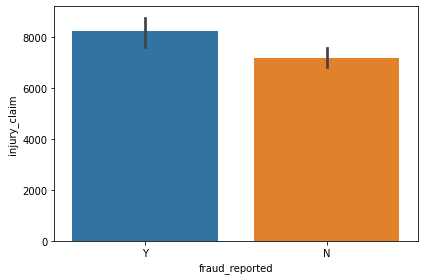

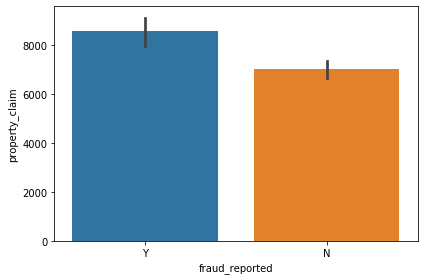

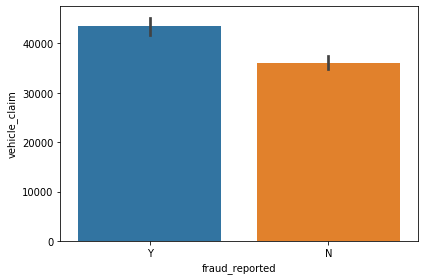

In [174]:
for i in ['months_as_customer','age','policy_deductable','policy_annual_premium','capital-gains',
    'capital-loss', 'incident_hour_of_the_day','number_of_vehicles_involved', 'bodily_injuries','witnesses',
    'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim']:
    sns.barplot(x='fraud_reported',y=i,data=df_fraud)
    plt.tight_layout()
    plt.show()

In [175]:
#Checking the correlation between the attributes
df_fraud.corr()

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
auto_year                             -0.000292  0.001354      -0.000183   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
age                                   0.029188               0.014404   
policy_number                        -0.006738               0.022566   
policy_deductable                     1.000000              -0.003245   
policy_annual_premium                -0.003245               1.000000   
umbrella_limit                        0.010870              -0.006247   
insured_zip                           0.004545               0.032354   
capital-gains                         0.035212              -0.013738   
capital-loss                         -0.023544               0.023547   
incident_hour_of_the_day              0.060935              -0.001578   
number_of_vehicles_involved           0.051214              -0.045991   
bodily_injuries                      -0.022765               0.026780   
witnesses                             0.066639               0.002332   
total_claim_amount                    0.022839               0.009094   
injury_claim                          0.039107              -0.017633   
property_claim                        0.064792              -0.011654   
vehicle_claim                         0.005269               0.020246   
auto_year                             0.026105              -0.049226   

                             umbrella_limit  insured_zip  capital-gains  \
months_as_customer                 0.015498     0.017895       0.006399   
age                                0.018126     0.025604      -0.007075   
policy_number                      0.008968     0.007083       0.009802   
policy_deductable                  0.010870     0.004545       0.035212   
policy_annual_premium             -0.006247     0.032354      -0.013738   
umbrella_limit                     1.000000     0.019671      -0.047268   
insured_zip                        0.019671     1.000000       0.006303   
capital-gains                     -0.047268     0.006303       1.000000   
capital-loss                      -0.024056     0.049372      -0.046904   
incident_hour_of_the_day          -0.023257     0.008274      -0.016406   
number_of_vehicles_involved       -0.021270     0.027448       0.061643   
bodily_injuries                    0.022743     0.028695       0.055829   
witnesses                         -0.006738     0.019805      -0.017651   
total_claim_amount                -0.040344    -0.033873       0.015980   
injury_claim                      -0.045412    -0.017495       0.025934

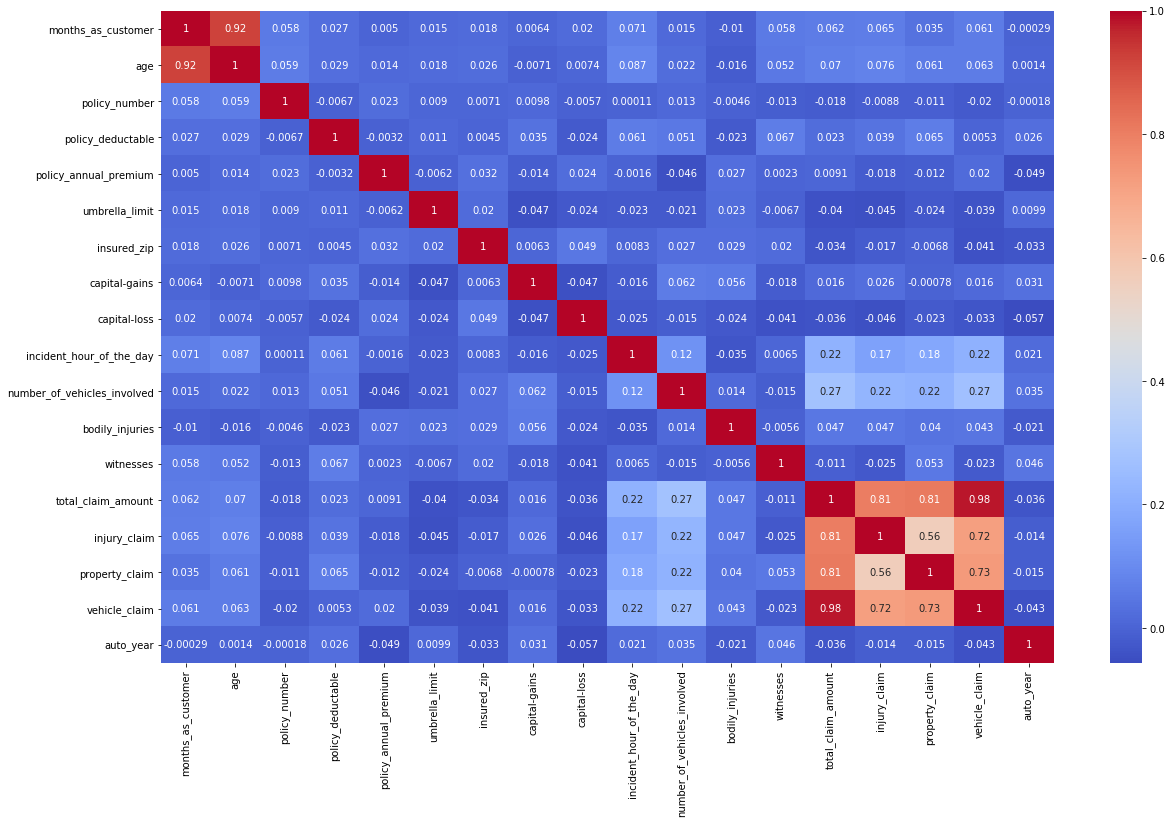

In [176]:
plt.figure(figsize=(20,12))
sns.heatmap(df_fraud.corr(),cmap='coolwarm',annot=True)
plt.show()

In [177]:
df_fraud.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [178]:
df_fraud.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                          object
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

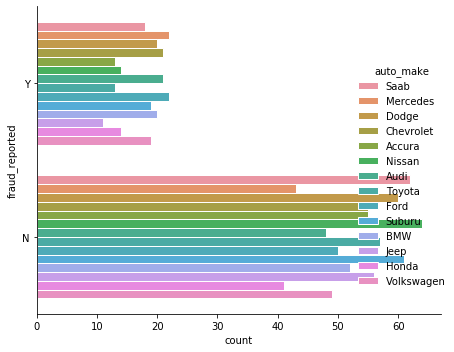

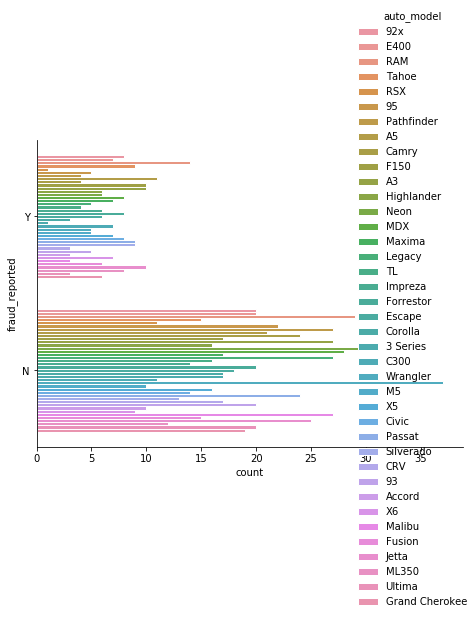

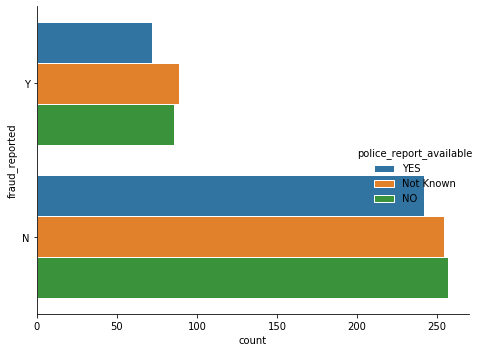

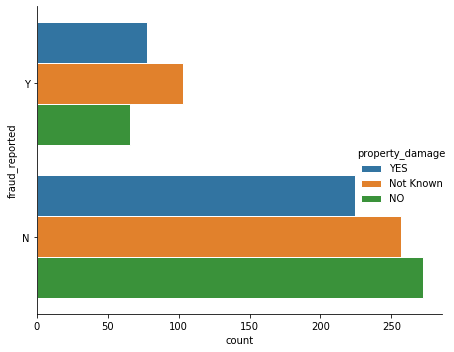

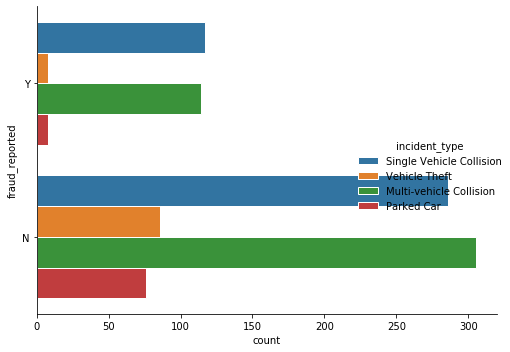

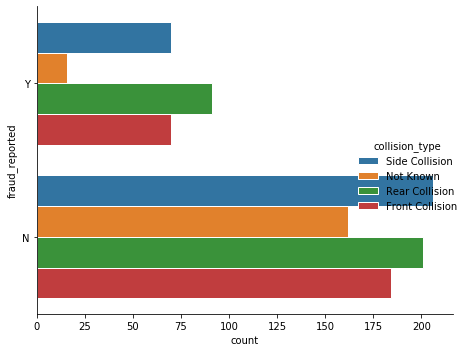

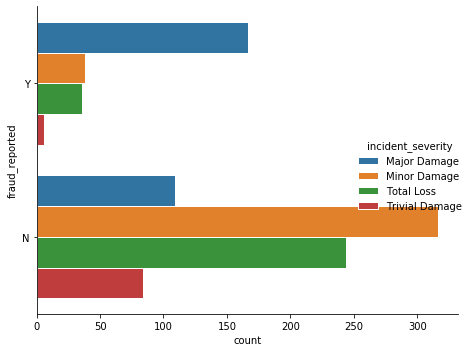

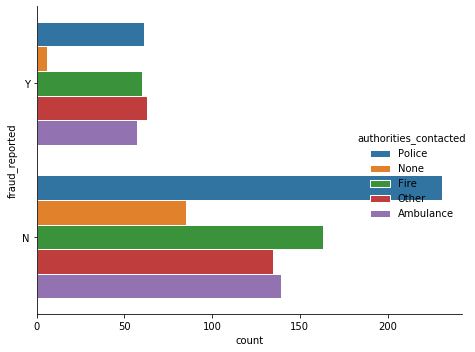

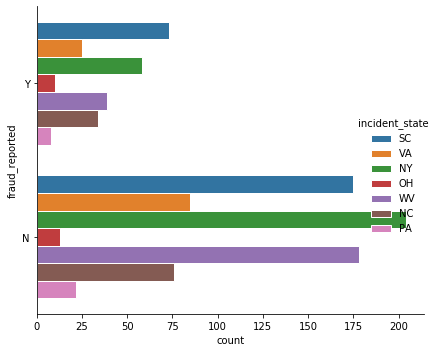

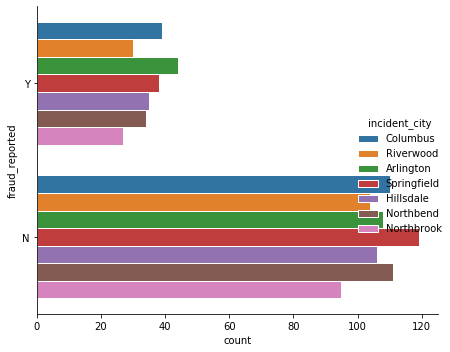

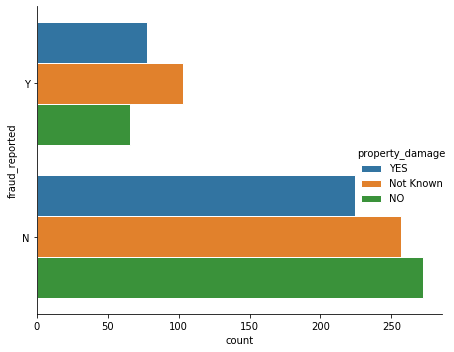

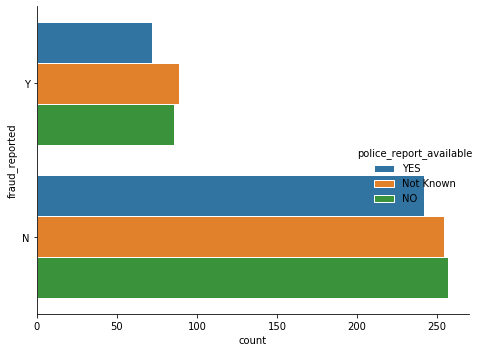

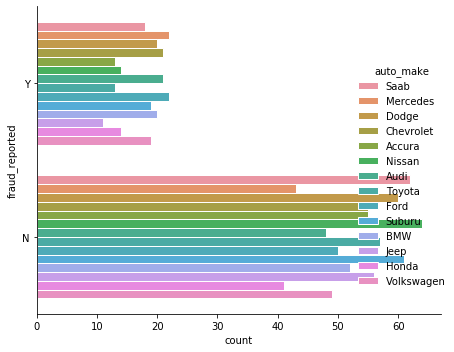

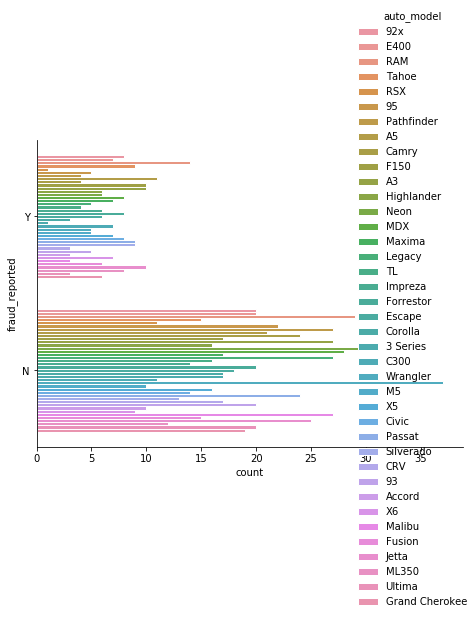

In [180]:
for i in ['auto_make','auto_model','police_report_available','property_damage',
'incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city',
'property_damage','police_report_available','auto_make','auto_model']:
    sns.catplot(y="fraud_reported", hue=i, kind="count",edgecolor="1",data=df_fraud)
    plt.tight_layout()
    plt.show()

# Multivariate Analysis

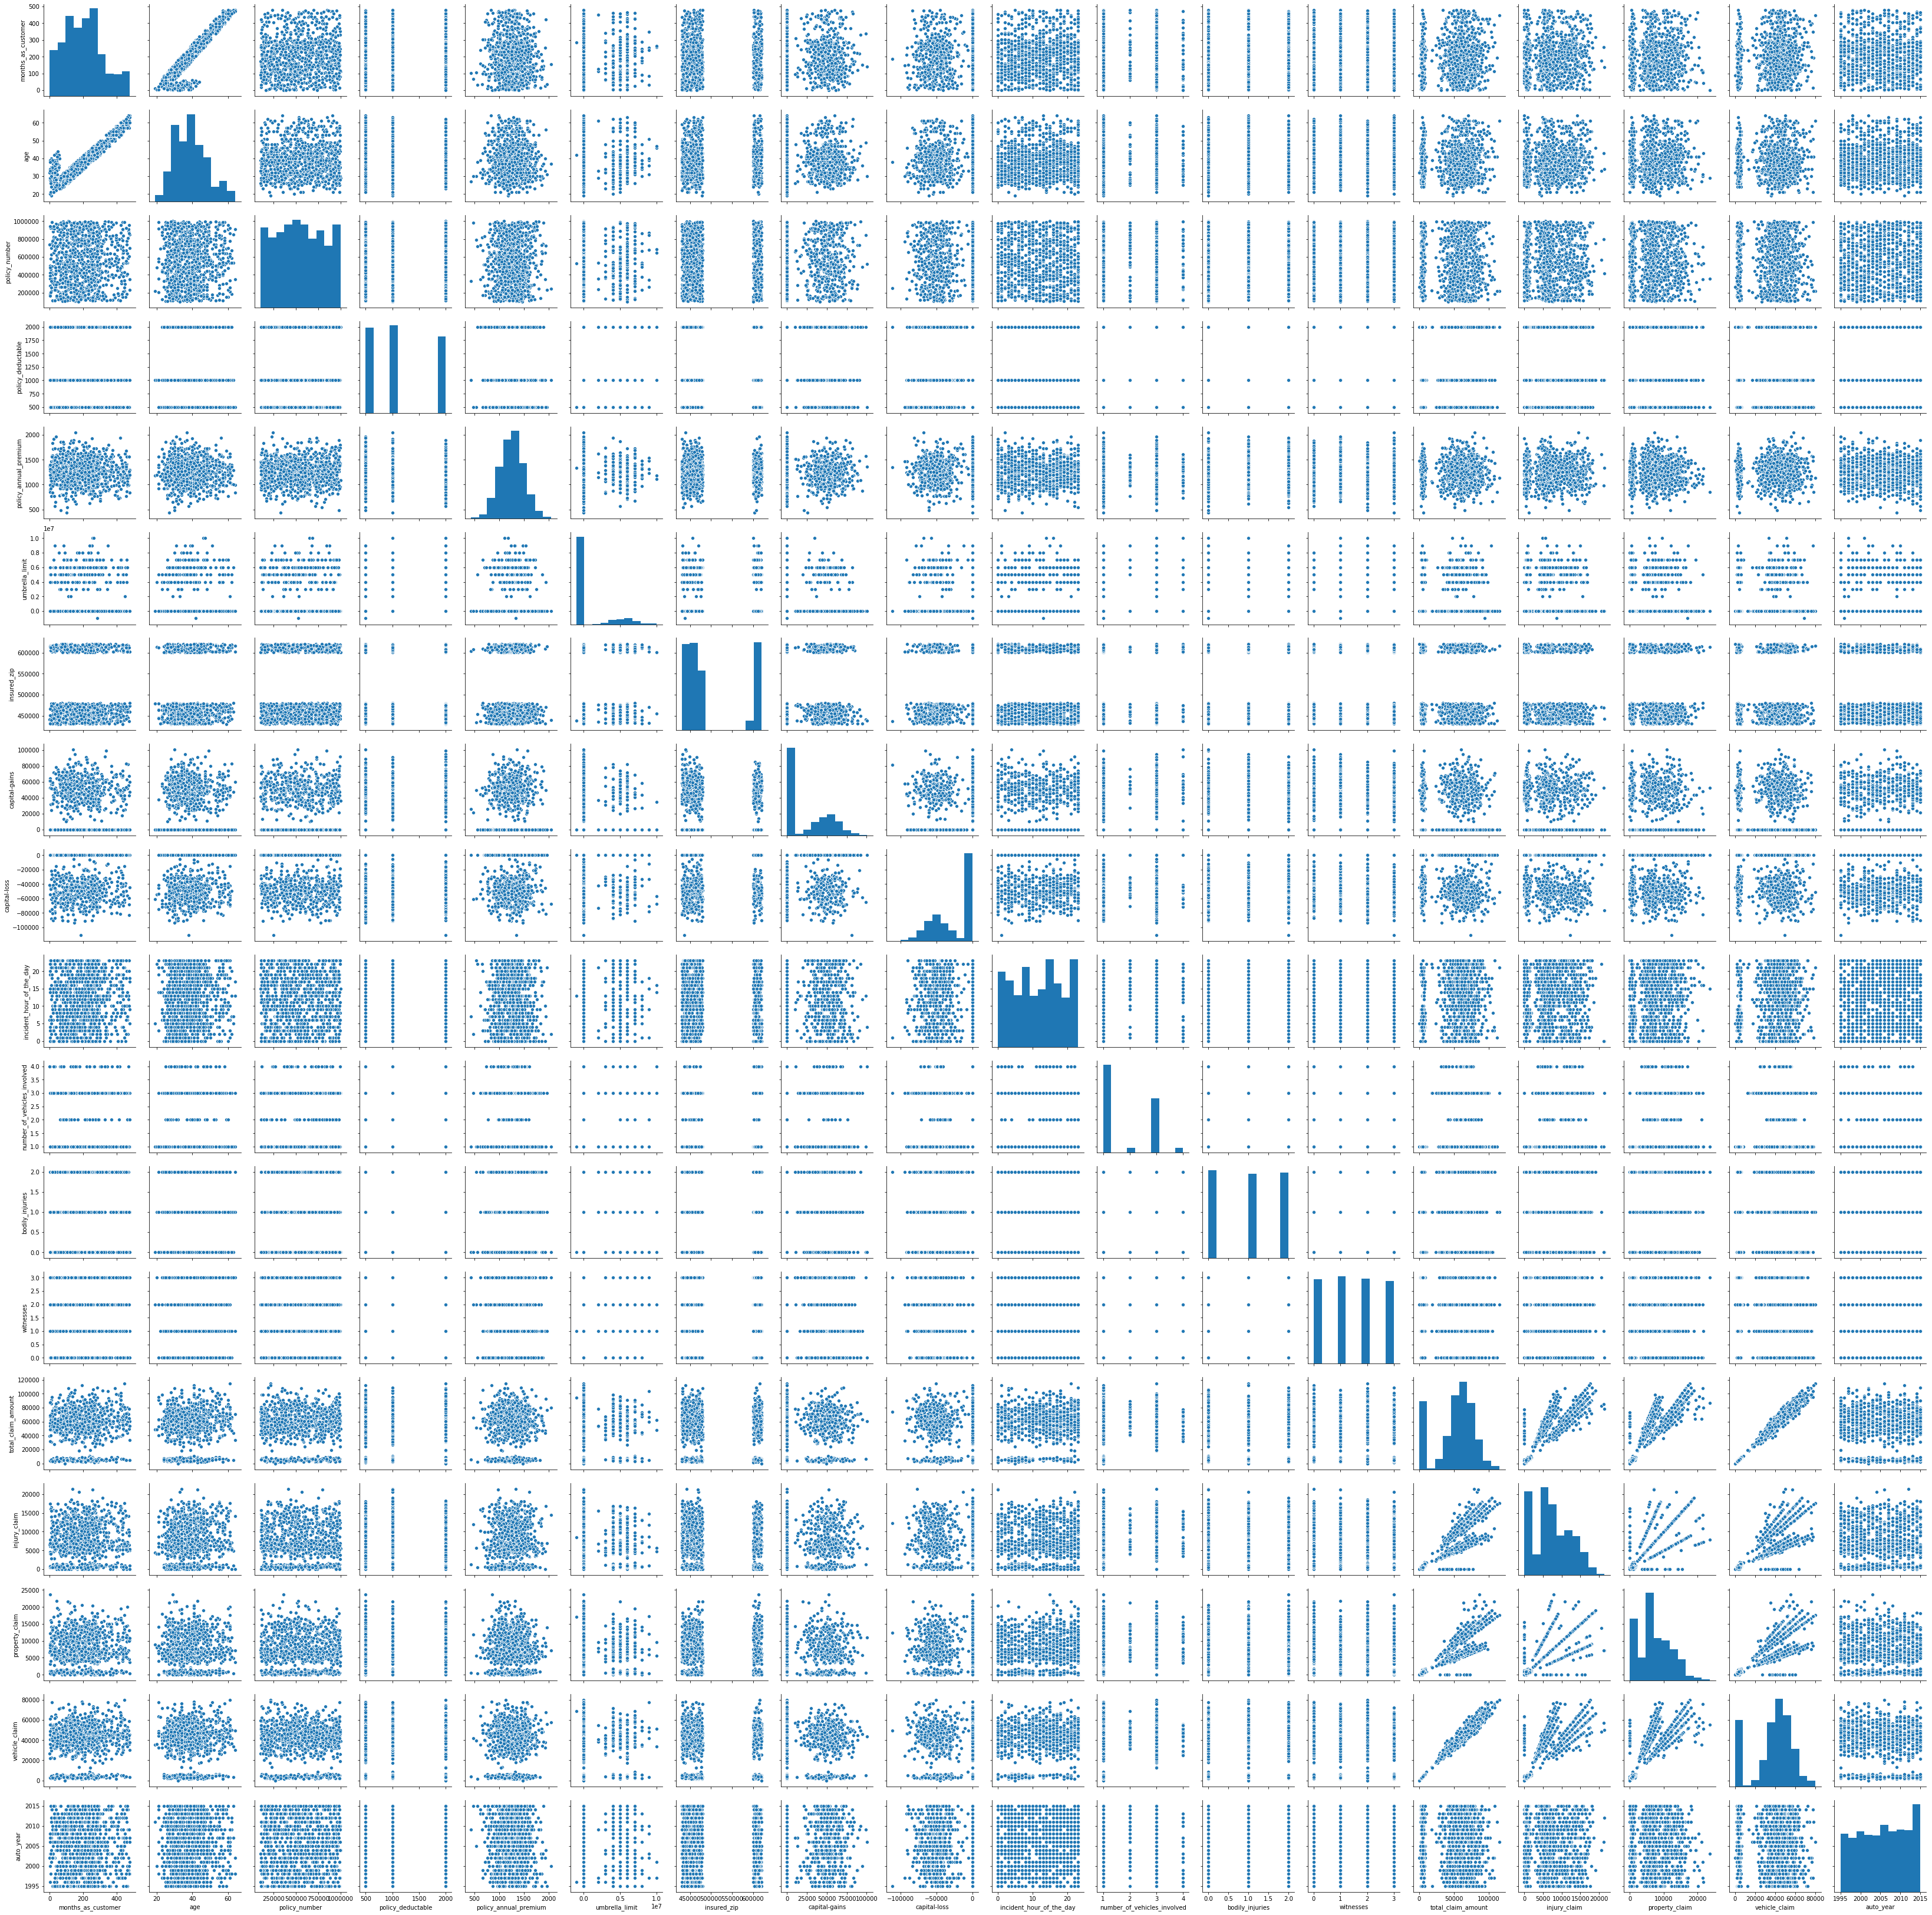

In [181]:
sns.pairplot(df_fraud)

In [182]:
df_fraud.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [183]:
for i in df_fraud.columns:
    print(df_fraud[i].value_counts())

194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64
116735    1
107181    1
430794    1
115399    1
328387    1
         ..
218456    1
179538    1
357713    1
247116    1
296960    1
Name: policy_number, Length: 1000, dtype: int64
1992-05-08    3
2006-01-01    3
1992-04-28    3
2014-05-07    2
1997-03-02    2
             ..
2003-03-16    1
2006-07-19    1
1992-10-04    1
1995-02-17    1
1996-08-07    1
Name: policy_bind_date, Length: 951, dtype: int64
OH   

In [184]:
df_fraud.drop(['policy_number', 'policy_bind_date',
       'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip','capital-gains', 'capital-loss',
       'incident_date','incident_hour_of_the_day','incident_location',
       'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses','auto_year'],axis=1,inplace=True)

In [185]:
df_fraud.columns

Index(['months_as_customer', 'age', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'property_damage', 'police_report_available',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')

In [186]:
for i in df_fraud.columns:
    print(df_fraud[i].value_counts())

194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64
43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76

In [187]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_fraud["fraud_reported"]=le.fit_transform(df_fraud["fraud_reported"])

In [188]:
df_fraud_new=pd.get_dummies(df_fraud)

In [189]:
df_fraud_new

months_as_customer  age  total_claim_amount  injury_claim  \
0                   328   48               71610          6510   
1                   228   42                5070           780   
2                   134   29               34650          7700   
3                   256   41               63400          6340   
4                   228   44                6500          1300   
..                  ...  ...                 ...           ...   
995                   3   38               87200         17440   
996                 285   41              108480         18080   
997                 130   34               67500          7500   
998                 458   62               46980          5220   
999                 456   60                5060           460   

     property_claim  vehicle_claim  fraud_reported  policy_csl_100/300  \
0             13020          52080               1                   0   
1               780           3510               1                   0   
2              3850          23100               0                   1   
3              6340          50720               1                   0   
4               650           4550               0                   0   
..              ...            ...             ...                 ...   
995            8720          61040               0                   0   
996           18080          72320               0                   1   
997            7500          52500               0                   0   
998            5220          36540               0                   0   
999             920           3680               0                   0   

     policy_csl_250/500  policy_csl_500/1000  ...  auto_model_Pathfinder  \
0                     1                    0  ...                      0   
1                     1                    0  ...                      0   
2                     0                    0  ...                      0   
3                     1                    0  ...                      0   
4                     0                    1  ...                      0   
..                  ...                  ...  ...                    ...   
995                   0                    1  ...                      0   
996                   0                    0  ...                      0   
997                   1                    0  ...                      0   
998                   0                    1  ...                      0   
999                   1                    0  ...                      0   

     auto_model_RAM  auto_model_RSX  auto_model_Silverado  auto_model_TL  \
0                 0               0                     0              0   
1                 0               0                     0              0   
2                 1               0                     0              0   
3                 0               0                     0              0   
4                 0               1                     0              0   
..              ...             ...                   ...            ...   
995               0               0                     0              0   
996               0               0                     0              0   
997               0               0                     0              0   
998               0               0                     0              0   
999               0               0                     0              0   

     auto_model_Tahoe  auto_model_Ultima  auto_model_Wrangler  auto_model_X5  \
0                   0                  0                    0              0   
1                   0                  0                    0              0   
2                   0                  0                    0              0   
3                   1                  0                    0              0   
4                   0                  0                    0              0   
..               

In [195]:
df_fraud_new[['months_as_customer','age','total_claim_amount','injury_claim','property_claim','vehicle_claim']].skew()

months_as_customer    0.362177
age                   0.478988
total_claim_amount   -0.594582
injury_claim          0.264811
property_claim        0.378169
vehicle_claim        -0.621098
dtype: float64

In [200]:
#removing outliers using zscore
from scipy.stats import zscore
zscore=np.abs(zscore(df_fraud_new[['months_as_customer','age','total_claim_amount','injury_claim','property_claim','vehicle_claim']]))
print(zscore)
print(np.where(zscore>3))
df_fraud_final=df_fraud_new[(zscore<3).all(axis=1)]

[[1.07813958 0.99083647 0.71425742 0.18928317 1.16550497 0.74965272]
 [0.2089946  0.33407345 1.80731185 1.36382194 1.37269599 1.82334593]
 [0.60800168 1.08891308 0.68636176 0.05464372 0.73607206 0.78556451]
 ...
 [0.64276748 0.54161057 0.55850675 0.01364761 0.0208261  0.77190224]
 [2.20802805 2.52328351 0.21910974 0.45370813 0.45197603 0.07357971]
 [2.19064515 2.3043625  1.80769081 1.42941572 1.34366428 1.81434017]]
(array([500], dtype=int64), array([4], dtype=int64))


In [201]:
print('Before removing outliers:',df_fraud_new.shape)
print('After removing outliers:',df_fraud_final.shape)

Before removing outliers: (1000, 149)
After removing outliers: (999, 149)


In [202]:
#separating into input and output variables
df_x=df_fraud_final.drop(columns=['fraud_reported'])
y=pd.DataFrame(df_fraud_final['fraud_reported'])

In [203]:
#checking the shape
df_x.shape

(999, 148)

In [204]:
y.shape

(999, 1)

In [205]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [206]:
x

months_as_customer       age  total_claim_amount  injury_claim  \
0              1.077515  0.989839            0.715786     -0.189096   
1              0.207449  0.333015           -1.806622     -1.363052   
2             -0.610414 -1.090105           -0.685299      0.054710   
3              0.451067  0.223544            0.404560     -0.223925   
4              0.207449  0.551956           -1.752413     -1.256515   
..                  ...       ...                 ...           ...   
994           -1.750201 -0.104868            1.306774      2.050231   
995            0.703386  0.223544            2.113460      2.181354   
996           -0.645216 -0.542751            0.559984      0.013734   
997            2.208601  2.522429           -0.217891     -0.453390   
998            2.191200  2.303488           -1.807001     -1.428613   

     property_claim  vehicle_claim  policy_csl_100/300  policy_csl_250/500  \
0          1.175012       0.750510           -0.732750            1.358732   
1         -1.376499      -1.822283           -0.732750            1.358732   
2         -0.736537      -0.784585            1.364721           -0.735980   
3         -0.217479       0.678470           -0.732750            1.358732   
4         -1.403598      -1.767194           -0.732750           -0.735980   
..              ...            ...                 ...                 ...   
994        0.278648       1.225129           -0.732750           -0.735980   
995        2.229803       1.822640            1.364721           -0.735980   
996        0.024330       0.772758           -0.732750            1.358732   
997       -0.450951      -0.072656           -0.732750           -0.735980   
998       -1.347315      -1.813278           -0.732750            1.358732   

     policy_csl_500/1000  insured_sex_FEMALE  ...  auto_model_Pathfinder  \
0              -0.653562           -1.075950  ...              -0.178955   
1              -0.653562           -1.075950  ...              -0.178955   
2              -0.653562            0.929412  ...              -0.178955   
3              -0.653562            0.929412  ...              -0.178955   
4               1.530077           -1.075950  ...              -0.178955   
..                   ...                 ...  ...                    ...   
994             1.530077            0.929412  ...              -0.178955   
995            -0.653562            0.929412  ...              -0.178955   
996            -0.653562            0.929412  ...              -0.178955   
997             1.530077           -1.075950  ...              -0.178955   
998            -0.653562            0.929412  ...              -0.178955   

     auto_model_RAM  auto_model_RSX  auto_model_Silverado  auto_model_TL  \
0         -0.212083       -0.110264              -0.15006       -0.14293   
1         -0.212083       -0.110264              -0.15006       -0.14293   
2          4.715141       -0.110264              -0.15006       -0.14293   
3         -0.212083       -0.110264              -0.15006       -0.14293   
4         -0.212083        9.069179              -0.15006       -0.14293   
..              ...             ...                   ...            ...   
994       -0.212083       -0.110264              -0.15006       -0.14293   
995       -0.212083       -0.110264              -0.15006       -0.14293   
996       -0.212083       -0.110264              -0.15006       -0.14293   
997       -0.212083       -0.110264              -0.15006       -0.14293   
998       -0.212083       -0.110264              -0.15006       -0.14293   

     auto_model_Tahoe  auto_model_Ultima  auto_model_Wrangler  auto_model_X5  \
0           -0.156893          -0.153511            -0.209493      -0.153511   
1           -0.156893          -0.153511            -0.209493      -0.153511   
2           -0.156893          -0.153511            -0.209493      -0.153511   
3            6.373774          -0.153511            -0.209493      -0

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB                                                                                                                   
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [208]:
max_acc_scr=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    model=[LogisticRegression(),SVC(),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier()]
    for m in model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        accscr=accuracy_score(y_test,predm)
        conmatrix=confusion_matrix(y_test,predm)
        classreport=classification_report(y_test,predm)
        print("accuracy score of",m,'is:')
        print('accuracy score corresponding to random state:',r_state,'is:',accscr)
        print('confusion matrix corresponding to random state:',r_state,'is:',conmatrix)
        print('classification report corresponding to random state:',r_state,'is:',classreport)
        if accscr>max_acc_scr:
            max_acc_scr=accscr
            final_r_state=r_state
            final_model=m
        print()

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 42 is: 0.77
confusion matrix corresponding to random state: 42 is: [[129  19]
 [ 27  25]]
classification report corresponding to random state: 42 is:               precision    recall  f1-score   support

           0       0.83      0.87      0.85       148
           1       0.57      0.48      0.52        52

    accuracy                           0.77       200
   macro avg       0.70      0.68      0.68       200
weighted avg       0.76      0.77      0.76       200


accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', 

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 44 is: 0.815
confusion matrix corresponding to random state: 44 is: [[141  12]
 [ 25  22]]
classification report corresponding to random state: 44 is:               precision    recall  f1-score   support

           0       0.85      0.92      0.88       153
           1       0.65      0.47      0.54        47

    accuracy                           0.81       200
   macro avg       0.75      0.69      0.71       200
weighted avg       0.80      0.81      0.80       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impu

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 46 is: 0.765
confusion matrix corresponding to random state: 46 is: [[140   7]
 [ 40  13]]
classification report corresponding to random state: 46 is:               precision    recall  f1-score   support

           0       0.78      0.95      0.86       147
           1       0.65      0.25      0.36        53

    accuracy                           0.77       200
   macro avg       0.71      0.60      0.61       200
weighted avg       0.74      0.77      0.72       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impu

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 48 is: 0.78
confusion matrix corresponding to random state: 48 is: [[143   7]
 [ 37  13]]
classification report corresponding to random state: 48 is:               precision    recall  f1-score   support

           0       0.79      0.95      0.87       150
           1       0.65      0.26      0.37        50

    accuracy                           0.78       200
   macro avg       0.72      0.61      0.62       200
weighted avg       0.76      0.78      0.74       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impur

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 50 is: 0.8
confusion matrix corresponding to random state: 50 is: [[150   8]
 [ 32  10]]
classification report corresponding to random state: 50 is:               precision    recall  f1-score   support

           0       0.82      0.95      0.88       158
           1       0.56      0.24      0.33        42

    accuracy                           0.80       200
   macro avg       0.69      0.59      0.61       200
weighted avg       0.77      0.80      0.77       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impuri

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 52 is: 0.825
confusion matrix corresponding to random state: 52 is: [[142   9]
 [ 26  23]]
classification report corresponding to random state: 52 is:               precision    recall  f1-score   support

           0       0.85      0.94      0.89       151
           1       0.72      0.47      0.57        49

    accuracy                           0.82       200
   macro avg       0.78      0.70      0.73       200
weighted avg       0.81      0.82      0.81       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impu

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 54 is: 0.8
confusion matrix corresponding to random state: 54 is: [[144   5]
 [ 35  16]]
classification report corresponding to random state: 54 is:               precision    recall  f1-score   support

           0       0.80      0.97      0.88       149
           1       0.76      0.31      0.44        51

    accuracy                           0.80       200
   macro avg       0.78      0.64      0.66       200
weighted avg       0.79      0.80      0.77       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impuri

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 56 is: 0.755
confusion matrix corresponding to random state: 56 is: [[139   8]
 [ 41  12]]
classification report corresponding to random state: 56 is:               precision    recall  f1-score   support

           0       0.77      0.95      0.85       147
           1       0.60      0.23      0.33        53

    accuracy                           0.76       200
   macro avg       0.69      0.59      0.59       200
weighted avg       0.73      0.76      0.71       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impu

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 58 is: 0.8
confusion matrix corresponding to random state: 58 is: [[145   5]
 [ 35  15]]
classification report corresponding to random state: 58 is:               precision    recall  f1-score   support

           0       0.81      0.97      0.88       150
           1       0.75      0.30      0.43        50

    accuracy                           0.80       200
   macro avg       0.78      0.63      0.65       200
weighted avg       0.79      0.80      0.77       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impuri

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 60 is: 0.825
confusion matrix corresponding to random state: 60 is: [[147  10]
 [ 25  18]]
classification report corresponding to random state: 60 is:               precision    recall  f1-score   support

           0       0.85      0.94      0.89       157
           1       0.64      0.42      0.51        43

    accuracy                           0.82       200
   macro avg       0.75      0.68      0.70       200
weighted avg       0.81      0.82      0.81       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impu

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 62 is: 0.775
confusion matrix corresponding to random state: 62 is: [[141   6]
 [ 39  14]]
classification report corresponding to random state: 62 is:               precision    recall  f1-score   support

           0       0.78      0.96      0.86       147
           1       0.70      0.26      0.38        53

    accuracy                           0.78       200
   macro avg       0.74      0.61      0.62       200
weighted avg       0.76      0.78      0.74       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impu

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 64 is: 0.805
confusion matrix corresponding to random state: 64 is: [[144   8]
 [ 31  17]]
classification report corresponding to random state: 64 is:               precision    recall  f1-score   support

           0       0.82      0.95      0.88       152
           1       0.68      0.35      0.47        48

    accuracy                           0.81       200
   macro avg       0.75      0.65      0.67       200
weighted avg       0.79      0.81      0.78       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impu

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 66 is: 0.805
confusion matrix corresponding to random state: 66 is: [[145   5]
 [ 34  16]]
classification report corresponding to random state: 66 is:               precision    recall  f1-score   support

           0       0.81      0.97      0.88       150
           1       0.76      0.32      0.45        50

    accuracy                           0.81       200
   macro avg       0.79      0.64      0.67       200
weighted avg       0.80      0.81      0.77       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impu

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 68 is: 0.79
confusion matrix corresponding to random state: 68 is: [[144   7]
 [ 35  14]]
classification report corresponding to random state: 68 is:               precision    recall  f1-score   support

           0       0.80      0.95      0.87       151
           1       0.67      0.29      0.40        49

    accuracy                           0.79       200
   macro avg       0.74      0.62      0.64       200
weighted avg       0.77      0.79      0.76       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impur

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 70 is: 0.78
confusion matrix corresponding to random state: 70 is: [[143   2]
 [ 42  13]]
classification report corresponding to random state: 70 is:               precision    recall  f1-score   support

           0       0.77      0.99      0.87       145
           1       0.87      0.24      0.37        55

    accuracy                           0.78       200
   macro avg       0.82      0.61      0.62       200
weighted avg       0.80      0.78      0.73       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impur

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 72 is: 0.77
confusion matrix corresponding to random state: 72 is: [[139   5]
 [ 41  15]]
classification report corresponding to random state: 72 is:               precision    recall  f1-score   support

           0       0.77      0.97      0.86       144
           1       0.75      0.27      0.39        56

    accuracy                           0.77       200
   macro avg       0.76      0.62      0.63       200
weighted avg       0.77      0.77      0.73       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impur

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 74 is: 0.755
confusion matrix corresponding to random state: 74 is: [[139   5]
 [ 44  12]]
classification report corresponding to random state: 74 is:               precision    recall  f1-score   support

           0       0.76      0.97      0.85       144
           1       0.71      0.21      0.33        56

    accuracy                           0.76       200
   macro avg       0.73      0.59      0.59       200
weighted avg       0.74      0.76      0.70       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impu

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 76 is: 0.78
confusion matrix corresponding to random state: 76 is: [[146   4]
 [ 40  10]]
classification report corresponding to random state: 76 is:               precision    recall  f1-score   support

           0       0.78      0.97      0.87       150
           1       0.71      0.20      0.31        50

    accuracy                           0.78       200
   macro avg       0.75      0.59      0.59       200
weighted avg       0.77      0.78      0.73       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impur

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 78 is: 0.77
confusion matrix corresponding to random state: 78 is: [[142   8]
 [ 38  12]]
classification report corresponding to random state: 78 is:               precision    recall  f1-score   support

           0       0.79      0.95      0.86       150
           1       0.60      0.24      0.34        50

    accuracy                           0.77       200
   macro avg       0.69      0.59      0.60       200
weighted avg       0.74      0.77      0.73       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impur

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 80 is: 0.775
confusion matrix corresponding to random state: 80 is: [[143   2]
 [ 43  12]]
classification report corresponding to random state: 80 is:               precision    recall  f1-score   support

           0       0.77      0.99      0.86       145
           1       0.86      0.22      0.35        55

    accuracy                           0.78       200
   macro avg       0.81      0.60      0.61       200
weighted avg       0.79      0.78      0.72       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impu

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 82 is: 0.795
confusion matrix corresponding to random state: 82 is: [[146   6]
 [ 35  13]]
classification report corresponding to random state: 82 is:               precision    recall  f1-score   support

           0       0.81      0.96      0.88       152
           1       0.68      0.27      0.39        48

    accuracy                           0.80       200
   macro avg       0.75      0.62      0.63       200
weighted avg       0.78      0.80      0.76       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impu

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 84 is: 0.755
confusion matrix corresponding to random state: 84 is: [[135   7]
 [ 42  16]]
classification report corresponding to random state: 84 is:               precision    recall  f1-score   support

           0       0.76      0.95      0.85       142
           1       0.70      0.28      0.40        58

    accuracy                           0.76       200
   macro avg       0.73      0.61      0.62       200
weighted avg       0.74      0.76      0.72       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impu

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 86 is: 0.815
confusion matrix corresponding to random state: 86 is: [[148   1]
 [ 36  15]]
classification report corresponding to random state: 86 is:               precision    recall  f1-score   support

           0       0.80      0.99      0.89       149
           1       0.94      0.29      0.45        51

    accuracy                           0.81       200
   macro avg       0.87      0.64      0.67       200
weighted avg       0.84      0.81      0.78       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impu

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 88 is: 0.82
confusion matrix corresponding to random state: 88 is: [[148   5]
 [ 31  16]]
classification report corresponding to random state: 88 is:               precision    recall  f1-score   support

           0       0.83      0.97      0.89       153
           1       0.76      0.34      0.47        47

    accuracy                           0.82       200
   macro avg       0.79      0.65      0.68       200
weighted avg       0.81      0.82      0.79       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impur

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 90 is: 0.78
confusion matrix corresponding to random state: 90 is: [[142   5]
 [ 39  14]]
classification report corresponding to random state: 90 is:               precision    recall  f1-score   support

           0       0.78      0.97      0.87       147
           1       0.74      0.26      0.39        53

    accuracy                           0.78       200
   macro avg       0.76      0.62      0.63       200
weighted avg       0.77      0.78      0.74       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impur

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 92 is: 0.79
confusion matrix corresponding to random state: 92 is: [[147   8]
 [ 34  11]]
classification report corresponding to random state: 92 is:               precision    recall  f1-score   support

           0       0.81      0.95      0.88       155
           1       0.58      0.24      0.34        45

    accuracy                           0.79       200
   macro avg       0.70      0.60      0.61       200
weighted avg       0.76      0.79      0.76       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impur

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 94 is: 0.73
confusion matrix corresponding to random state: 94 is: [[132   3]
 [ 51  14]]
classification report corresponding to random state: 94 is:               precision    recall  f1-score   support

           0       0.72      0.98      0.83       135
           1       0.82      0.22      0.34        65

    accuracy                           0.73       200
   macro avg       0.77      0.60      0.59       200
weighted avg       0.75      0.73      0.67       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impur

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 96 is: 0.79
confusion matrix corresponding to random state: 96 is: [[147   7]
 [ 35  11]]
classification report corresponding to random state: 96 is:               precision    recall  f1-score   support

           0       0.81      0.95      0.88       154
           1       0.61      0.24      0.34        46

    accuracy                           0.79       200
   macro avg       0.71      0.60      0.61       200
weighted avg       0.76      0.79      0.75       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impur

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 98 is: 0.845
confusion matrix corresponding to random state: 98 is: [[148   8]
 [ 23  21]]
classification report corresponding to random state: 98 is:               precision    recall  f1-score   support

           0       0.87      0.95      0.91       156
           1       0.72      0.48      0.58        44

    accuracy                           0.84       200
   macro avg       0.79      0.71      0.74       200
weighted avg       0.83      0.84      0.83       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impu

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 100 is: 0.78
confusion matrix corresponding to random state: 100 is: [[138   4]
 [ 40  18]]
classification report corresponding to random state: 100 is:               precision    recall  f1-score   support

           0       0.78      0.97      0.86       142
           1       0.82      0.31      0.45        58

    accuracy                           0.78       200
   macro avg       0.80      0.64      0.66       200
weighted avg       0.79      0.78      0.74       200


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_im

In [209]:
print("Max accuracy Score corresponding to random state",final_r_state,"is",max_acc_scr,'and model is',final_model)

Max accuracy Score corresponding to random state 81 is 0.87 and model is LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [210]:
LR=LogisticRegression()
SV=SVC()
DT=DecisionTreeClassifier()
KNN=KNeighborsClassifier()
GNB=GaussianNB()
RFC=RandomForestClassifier()

In [211]:
models=[]
models.append(('LogisticRegression',LR))
models.append(('SVC',SV))
models.append(('DecisionTreeClassifier',DT))
models.append(('KNeighborsClassifier',KNN))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))

*********** LogisticRegression ***********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score= 0.79


roc_auc_score= 0.7399222923749392


classification_report
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       142
           1       0.64      0.62      0.63        58

    accuracy                           0.79       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.79      0.79      0.79       200



[[122  20]
 [ 22  36]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********** SVC ***********


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degre

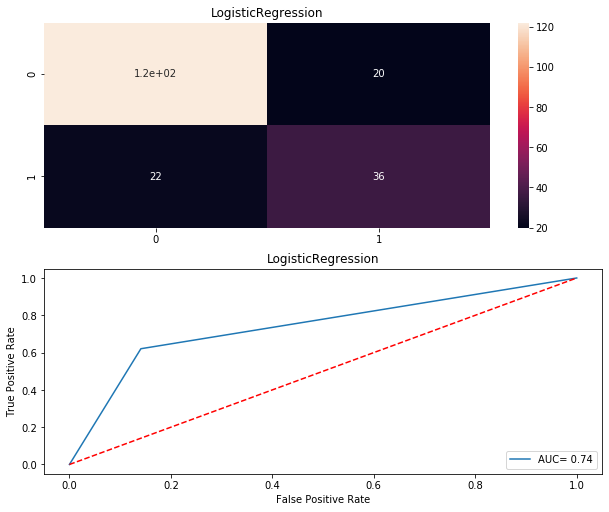

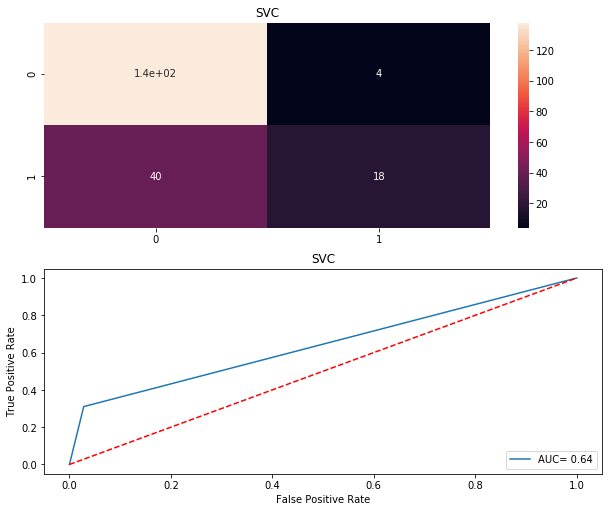

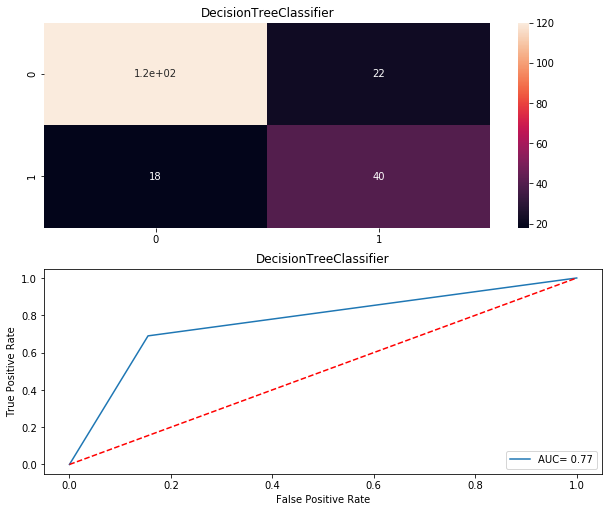

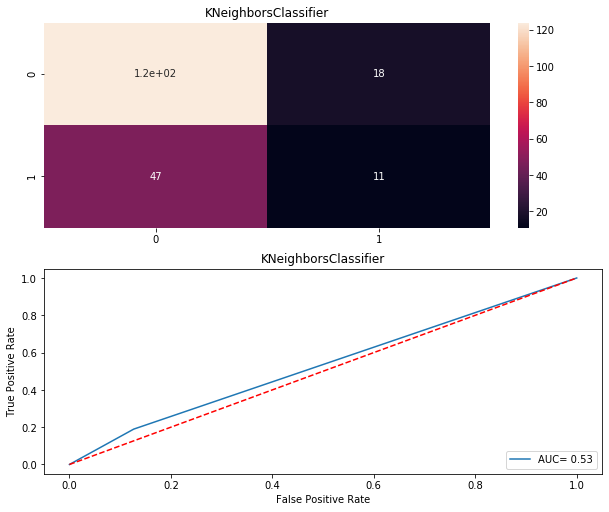

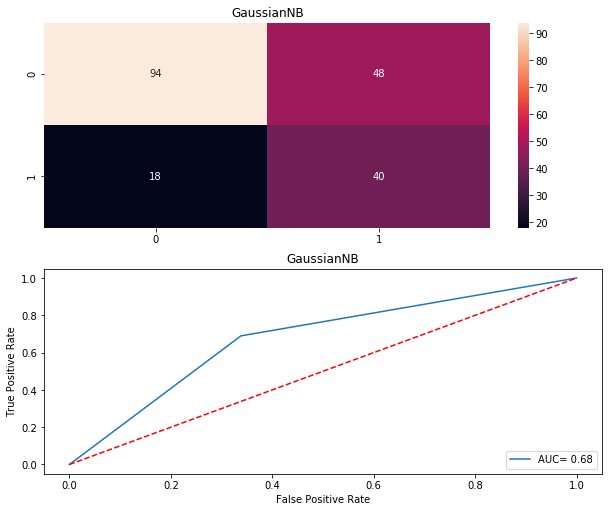

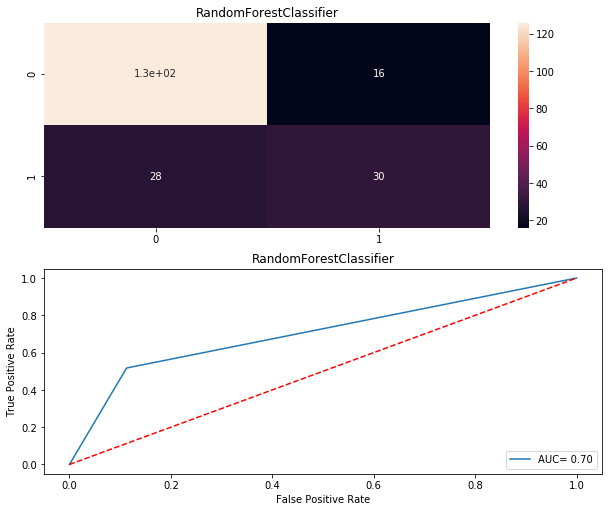

In [212]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('***********',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print("Accuracy_score=",AS)
    score.append(AS*100)
    print('\n')
    false_positive_rate,true_positive_rate, thresholds = roc_curve(y_test,pre) #
    roc_auc= auc(false_positive_rate,true_positive_rate) #
    print("roc_auc_score=",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')   

In [213]:
import sklearn
from sklearn.model_selection import cross_val_score
score=cross_val_score(sklearn.linear_model.LogisticRegression(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.82       0.79       0.78       0.87       0.85929648]
0.823859296482412
0.03597149616923257


In [214]:
#Trying to use Gradient Boosting Technique
#For getting best set of parameters, using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={'learning_rate':[0.0001,0.001,0.01,0.1,1],'n_estimators':[50,100,150,200,250,300,350,400,450,500]}
clf=GridSearchCV(gbc,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 450}

In [215]:
#Using cross val score to check the mean score and standard deviation
gbc=GradientBoostingClassifier(learning_rate=0.1,n_estimators=450)
print("Mean score for Gradient Boosting Classifier:",cross_val_score(gbc,x,y,cv=5).mean())
print('Standard Deviation in score for Gradient Boosting Classifier:',cross_val_score(gbc,x,y,cv=5).std())

Mean score for Gradient Boosting Classifier: 0.8288291457286432
Standard Deviation in score for Gradient Boosting Classifier: 0.014062689945519864


In [216]:
#Using Ada Boost Classifier algorithm
from sklearn.ensemble import AdaBoostClassifier
ada_cls=AdaBoostClassifier()
parameters={'learning_rate':[0.0001,0.001,0.01,0.1,1],'n_estimators':[50,100,150,200,250,300,350,400,450,500],'base_estimator':[LR,SV,DT,KNN,GNB,RFC]}
clf=GridSearchCV(ada_cls,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'learning_rate': 0.1,
 'n_estimators': 200}

In [217]:
#Using cross val score to check the mean score and standard deviation
ada_cls=AdaBoostClassifier(learning_rate=0.1,n_estimators=200,base_estimator=LR)
print("Mean score for AdaBoostClassifier:",cross_val_score(ada_cls,x,y,cv=5).mean())
print('Standard Deviation in score for AdaBoostClassifier:',cross_val_score(ada_cls,x,y,cv=5).std())

Mean score for AdaBoostClassifier: 0.816854271356784
Standard Deviation in score for AdaBoostClassifier: 0.038535821912415356


In [218]:
max_acc_scr=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    model=[GradientBoostingClassifier(learning_rate=0.0001,n_estimators=50),AdaBoostClassifier(learning_rate=0.1,n_estimators=200,base_estimator=LR)]
    for m in model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        accscr=accuracy_score(y_test,predm)
        conmatrix=confusion_matrix(y_test,predm)
        classreport=classification_report(y_test,predm)
        print("accuracy score of",m,'is:')
        print('accuracy score corresponding to random state:',r_state,'is:',accscr)
        print('confusion matrix corresponding to random state:',r_state,'is:',conmatrix)
        print('classification report corresponding to random state:',r_state,'is:',classreport)
        if accscr>max_acc_scr:
            max_acc_scr=accscr
            final_r_state=r_state
            final_model=m
        print()

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 42 is: 0.74
confusion matrix corresponding to random state: 42 is: [[148   0]
 [ 52   0]]
classification report corresponding to random state: 42 is:               precision    recall  f1-score   support

           0       0.74     

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 45 is: 0.755
confusion matrix corresponding to random state: 45 is: [[151   0]
 [ 49   0]]
classification report corresponding to random state: 45 is:               precision    recall  f1-score   support

           0       0.76    

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 48 is: 0.75
confusion matrix corresponding to random state: 48 is: [[150   0]
 [ 50   0]]
classification report corresponding to random state: 48 is:               precision    recall  f1-score   support

           0       0.75     

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 51 is: 0.735
confusion matrix corresponding to random state: 51 is: [[147   0]
 [ 53   0]]
classification report corresponding to random state: 51 is:               precision    recall  f1-score   support

           0       0.73    

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 54 is: 0.745
confusion matrix corresponding to random state: 54 is: [[149   0]
 [ 51   0]]
classification report corresponding to random state: 54 is:               precision    recall  f1-score   support

           0       0.74    

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 57 is: 0.77
confusion matrix corresponding to random state: 57 is: [[154   0]
 [ 46   0]]
classification report corresponding to random state: 57 is:               precision    recall  f1-score   support

           0       0.77     

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 60 is: 0.785
confusion matrix corresponding to random state: 60 is: [[157   0]
 [ 43   0]]
classification report corresponding to random state: 60 is:               precision    recall  f1-score   support

           0       0.79    

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 63 is: 0.77
confusion matrix corresponding to random state: 63 is: [[154   0]
 [ 46   0]]
classification report corresponding to random state: 63 is:               precision    recall  f1-score   support

           0       0.77     

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 66 is: 0.75
confusion matrix corresponding to random state: 66 is: [[150   0]
 [ 50   0]]
classification report corresponding to random state: 66 is:               precision    recall  f1-score   support

           0       0.75     

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 69 is: 0.785
confusion matrix corresponding to random state: 69 is: [[157   0]
 [ 43   0]]
classification report corresponding to random state: 69 is:               precision    recall  f1-score   support

           0       0.79    

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 72 is: 0.72
confusion matrix corresponding to random state: 72 is: [[144   0]
 [ 56   0]]
classification report corresponding to random state: 72 is:               precision    recall  f1-score   support

           0       0.72     

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 75 is: 0.785
confusion matrix corresponding to random state: 75 is: [[157   0]
 [ 43   0]]
classification report corresponding to random state: 75 is:               precision    recall  f1-score   support

           0       0.79    

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 78 is: 0.75
confusion matrix corresponding to random state: 78 is: [[150   0]
 [ 50   0]]
classification report corresponding to random state: 78 is:               precision    recall  f1-score   support

           0       0.75     

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 81 is: 0.785
confusion matrix corresponding to random state: 81 is: [[157   0]
 [ 43   0]]
classification report corresponding to random state: 81 is:               precision    recall  f1-score   support

           0       0.79    

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 84 is: 0.71
confusion matrix corresponding to random state: 84 is: [[142   0]
 [ 58   0]]
classification report corresponding to random state: 84 is:               precision    recall  f1-score   support

           0       0.71     

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 87 is: 0.77
confusion matrix corresponding to random state: 87 is: [[154   0]
 [ 46   0]]
classification report corresponding to random state: 87 is:               precision    recall  f1-score   support

           0       0.77     

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 90 is: 0.735
confusion matrix corresponding to random state: 90 is: [[147   0]
 [ 53   0]]
classification report corresponding to random state: 90 is:               precision    recall  f1-score   support

           0       0.73    

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 93 is: 0.745
confusion matrix corresponding to random state: 93 is: [[149   0]
 [ 51   0]]
classification report corresponding to random state: 93 is:               precision    recall  f1-score   support

           0       0.74    

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 96 is: 0.77
confusion matrix corresponding to random state: 96 is: [[154   0]
 [ 46   0]]
classification report corresponding to random state: 96 is:               precision    recall  f1-score   support

           0       0.77     

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 99 is: 0.745
confusion matrix corresponding to random state: 99 is: [[149   0]
 [ 51   0]]
classification report corresponding to random state: 99 is:               precision    recall  f1-score   support

           0       0.74    

In [220]:
print("Max accuracy Score corresponding to random state",final_r_state,"is",max_acc_scr,'and model is',final_model)

Max accuracy Score corresponding to random state 76 is 0.875 and model is AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=None,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                  

In [221]:
#We tried all methods and till now AdaBoostClassifier is the best option 
#Random state corresponding to highest r2 score is 76
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=76,test_size=0.20)
ada_cls=AdaBoostClassifier(base_estimator=LogisticRegression(),learning_rate=0.1,n_estimators=200)
ada_cls.fit(x_train,y_train)
y_pred=ada_cls.predict(x_test)
print("Mean score for AdaBoostClassifier:",cross_val_score(ada_cls,x,y,cv=5).mean())
print('Standard Deviation in score for AdaBoostClassifier:',cross_val_score(ada_cls,x,y,cv=5).std())

Mean score for AdaBoostClassifier: 0.816854271356784
Standard Deviation in score for AdaBoostClassifier: 0.038535821912415356


In [222]:
#Saving the modelas a pickle in a file
from sklearn.externals import joblib
joblib.dump(ada_cls,"Project11_LoanFraud.pkl")

['Project11_LoanFraud.pkl']